In [2]:
import numpy as np
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
import matplotlib.pylab as plt
import pandas as pd
import pickle

In [40]:
history_it = pd.read_pickle("./TL_100_Dropout20/Outputs/RN_TL_100_dropout20_it_history.pkl")
# history_ft = pd.read_pickle("./Outputs/RN_noTL_ft_history.pkl")

In [41]:
len(history_it["loss"])

22

In [42]:
acc = history_it["accuracy"]
val_acc = history_it["val_accuracy"]
loss = history_it["loss"]
val_loss = history_it["val_loss"]

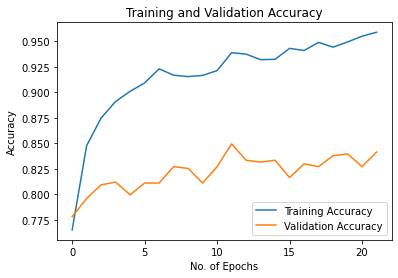

In [43]:
ax = plt.subplot()
plt.plot(acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
ax.set_xlabel('No. of Epochs');ax.set_ylabel('Accuracy');
plt.show()

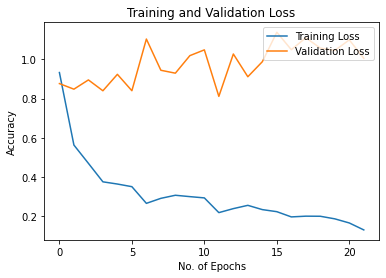

In [44]:
ax = plt.subplot()
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
ax.set_xlabel('No. of Epochs');ax.set_ylabel('Accuracy');
plt.show()

In [45]:
print(history_it["accuracy"][-1])
print(history_it["val_accuracy"][-1])

0.9587468504905701
0.8414959907531738


In [3]:
# Defining data generators and data augmentation parameters
gen_params = {"featurewise_center":False,\
              "samplewise_center":False,\
              "featurewise_std_normalization":False, \
              "samplewise_std_normalization":False,\
              "zca_whitening":False, \
              "rotation_range":20, \
               "width_shift_range":0.1,   \
               "height_shift_range":0.1,  \
               "shear_range":0.2,            \
               "zoom_range":0.1,    \
               "horizontal_flip":True,   \
               "vertical_flip":True}

In [4]:
class_names = ["Black", "Blue",  "Green", "Take-to-recycle"]
bs = 64 # batch size

In [5]:
train_gen = ImageDataGenerator(**gen_params, preprocessing_function = tf.keras.applications.resnet.preprocess_input)
val_gen = ImageDataGenerator(**gen_params, preprocessing_function = tf.keras.applications.resnet.preprocess_input)
test_gen = ImageDataGenerator(**gen_params, preprocessing_function = tf.keras.applications.resnet.preprocess_input)

train_generator = train_gen.flow_from_directory(
    directory = "./Train",
    target_size=(256, 256),
    color_mode="rgb",
    classes= class_names,
    class_mode="categorical",
    batch_size=bs,
    shuffle=True,
    seed=42,
    interpolation="nearest",
)

validation_generator = val_gen.flow_from_directory(
    directory = "./Validation",
    target_size=(256, 256),
    color_mode="rgb",
    classes= class_names,
    class_mode="categorical",
    batch_size=bs,
    shuffle=True,
    seed=42,
    interpolation="nearest",)

test_generator = test_gen.flow_from_directory(
    directory = "./Test",
    target_size=(256, 256),
    color_mode="rgb",
    classes= class_names,
    class_mode="categorical",
    batch_size=bs,
    shuffle=True,
    seed=42,
    interpolation="nearest",
)

Found 5139 images belonging to 4 classes.
Found 1123 images belonging to 4 classes.
Found 807 images belonging to 4 classes.


In [6]:
train_generator.labels

array([0, 0, 0, ..., 3, 3, 3])

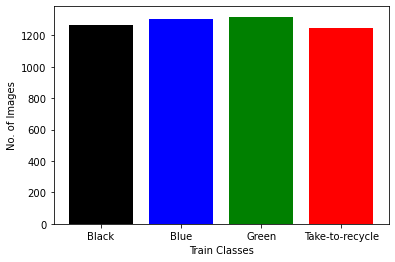

In [7]:
from collections import Counter
countertrain = Counter(train_generator.classes)

ax = plt.subplot()

plt.bar(range(len(countertrain)), list(countertrain.values()), align='center', color=['black', 'blue', 'green', 'red'])
plt.xticks(range(len(countertrain)), list(countertrain.keys()))
ax.set_xlabel('Train Classes');ax.set_ylabel('No. of Images');
ax.xaxis.set_ticklabels(class_names);

dict_values([1264, 1306, 1319, 1250])

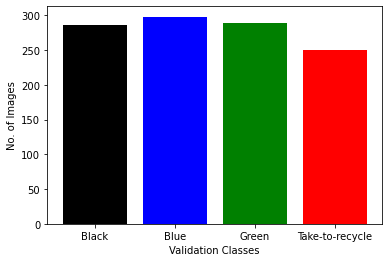

In [9]:
counterval = Counter(validation_generator.classes)

ax = plt.subplot()

plt.bar(range(len(counterval)), list(counterval.values()), align='center', color=['black', 'blue', 'green', 'red'])
plt.xticks(range(len(counterval)), list(counterval.keys()))
ax.set_xlabel('Validation Classes');ax.set_ylabel('No. of Images');
ax.xaxis.set_ticklabels(class_names);

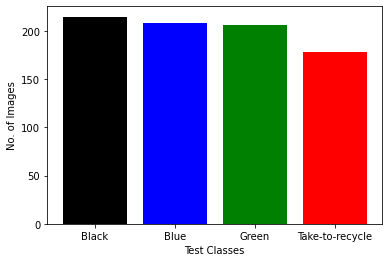

In [10]:
countertest = Counter(test_generator.classes)

ax = plt.subplot()

plt.bar(range(len(countertest)), list(countertest.values()), align='center', color=['black', 'blue', 'green', 'red'])
plt.xticks(range(len(countertest)), list(countertest.keys()))
ax.set_xlabel('Test Classes');ax.set_ylabel('No. of Images');
ax.xaxis.set_ticklabels(class_names);

In [25]:
total = []

for i in range(len(list(countertrain.values()))):
    total.append(list(countertrain.values())[i] + list(counterval.values())[i] + list(countertest.values())[i])
               
total

[1765, 1812, 1814, 1678]

In [26]:
print(list(countertrain.values()))
print(list(counterval.values()))
print(list(countertest.values()))

[1264, 1306, 1319, 1250]
[286, 298, 289, 250]
[215, 208, 206, 178]


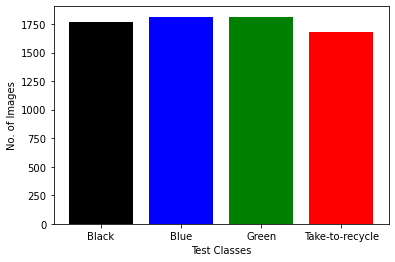

In [27]:
ax = plt.subplot()

plt.bar(range(len(total)), total, align='center', color=['black', 'blue', 'green', 'red'])
plt.xticks(range(len(total)), list(countertest.keys()))
ax.set_xlabel('Test Classes');ax.set_ylabel('No. of Images');
ax.xaxis.set_ticklabels(class_names);